In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install torch-geometric
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# **DATA EXPLORATION AND PREPROCESSING**

In [27]:
df = pd.read_csv('/content/TASK-ML-INTERN.csv')
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [28]:
df.shape

(500, 450)

In [29]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

In [30]:
df.isna().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [31]:
df = df.dropna()

In [32]:
df.isna().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [33]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [34]:
df.drop(columns = 'hsi_id',inplace=True)

In [35]:
df.duplicated().sum()


0

In [36]:
# Load Data
df = pd.read_csv('TASK-ML-INTERN.csv')
df.drop(columns=['hsi_id'], inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Impute or remove NaN values before outlier removal
X = X.fillna(X.median())

# Remove Outliers (IQR method)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using Mutual Information
selector = SelectKBest(score_func=mutual_info_regression, k=min(50, X_train.shape[1]))
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

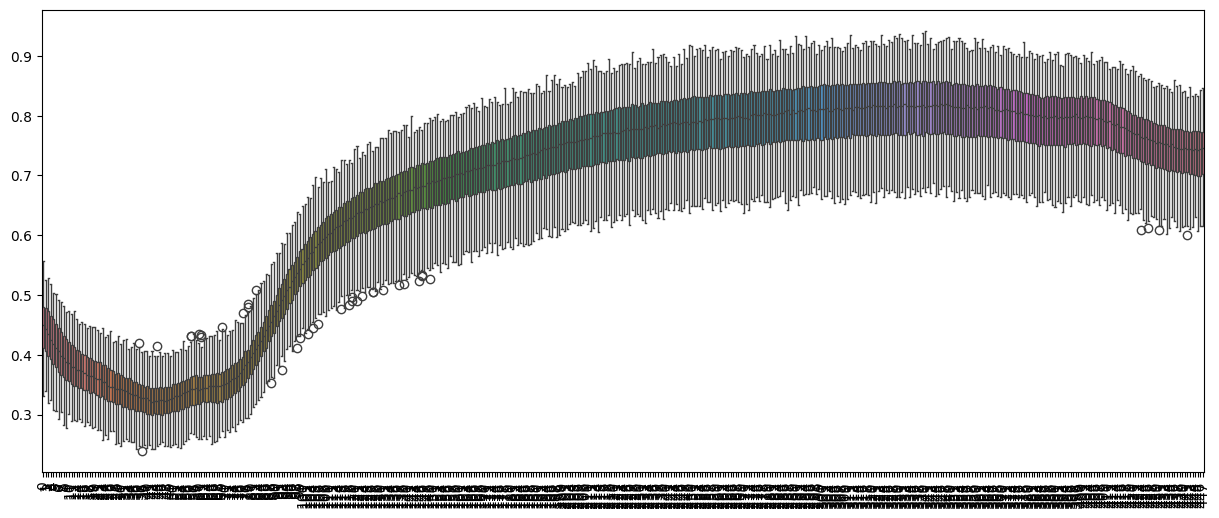

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()


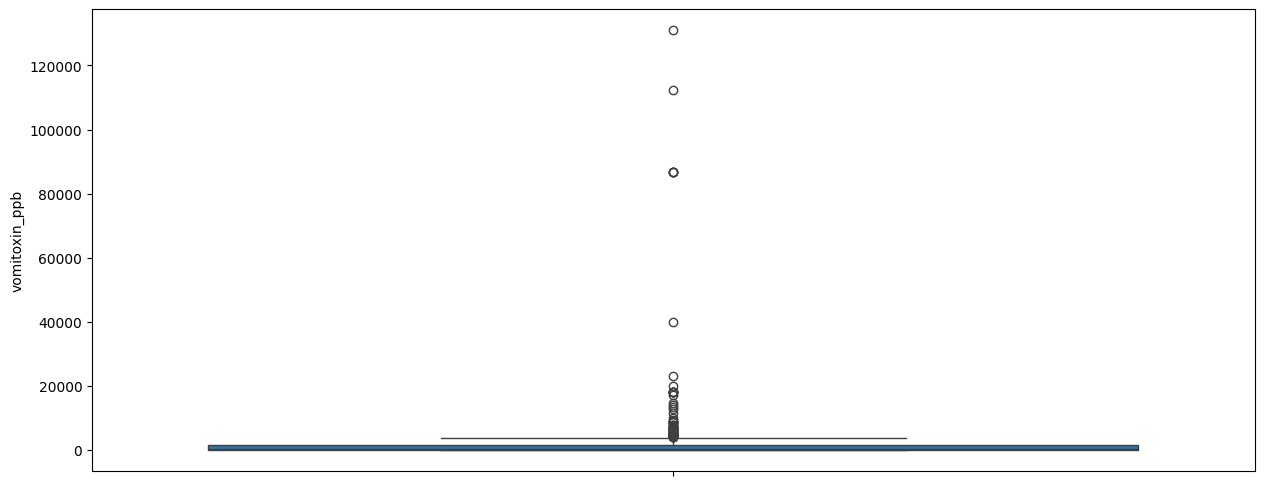

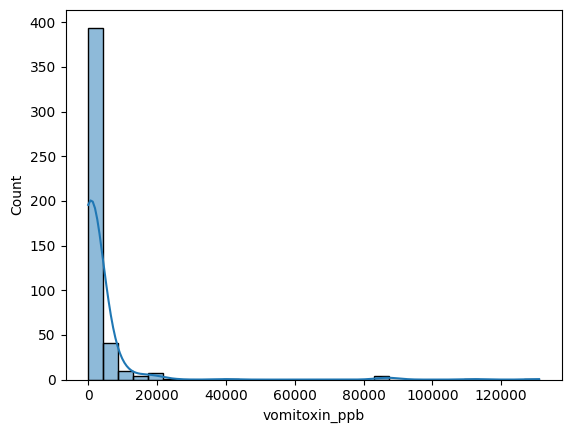

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(data=y)
plt.xticks(rotation=90)
plt.show()
sns.histplot(data=y, bins=30, kde=True)
plt.show()


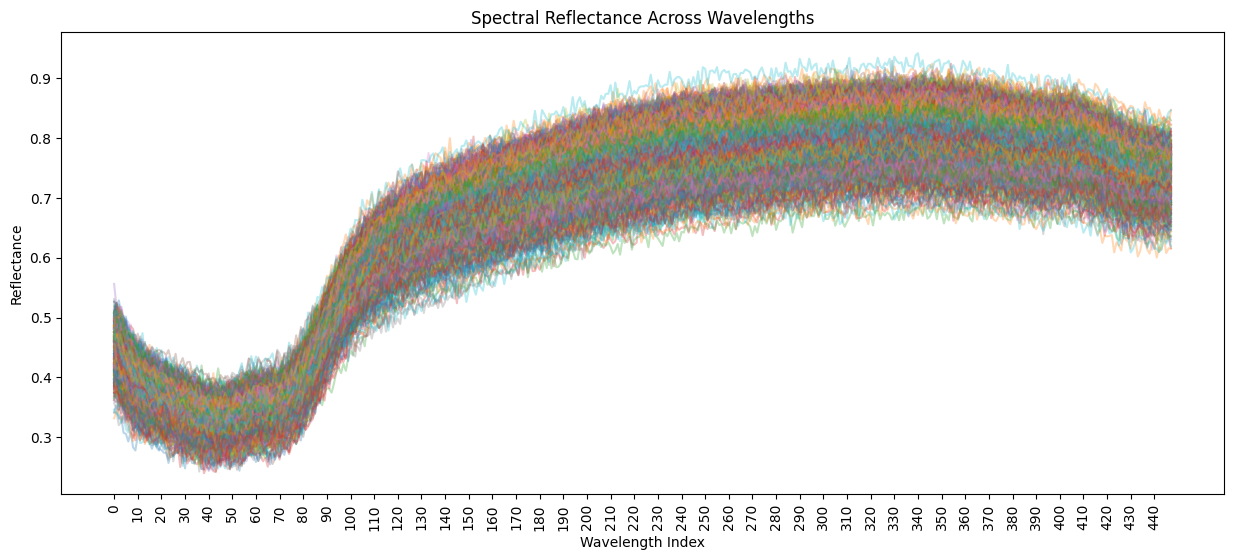

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(X.T, alpha=0.3)

plt.title('Spectral Reflectance Across Wavelengths')
plt.xlabel('Wavelength Index')
plt.ylabel('Reflectance')

plt.xticks(ticks=range(0, len(X.columns), 10), rotation=90)

plt.show()


# line plots for average reflectance

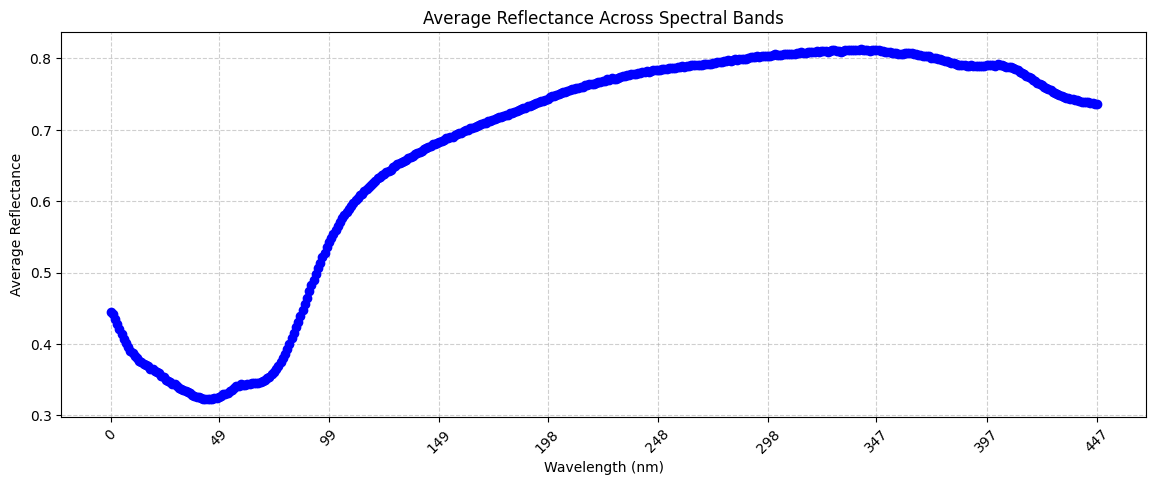

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute mean reflectance across samples
mean_reflectance = X.mean(axis=0)

plt.figure(figsize=(14, 5))
plt.plot(mean_reflectance.index, mean_reflectance.values, marker='o', linestyle='-', color='b')

plt.title('Average Reflectance Across Spectral Bands')

if np.issubdtype(X.columns.dtype, np.number):
    plt.xlabel('Wavelength Index')
else:
    plt.xlabel('Wavelength (nm)')

plt.ylabel('Average Reflectance')
plt.grid(True, linestyle='--', alpha=0.6)


xtick_positions = np.linspace(0, len(mean_reflectance) - 1, num=10, dtype=int)
plt.xticks(xtick_positions, labels=mean_reflectance.index[xtick_positions], rotation=45)

plt.show()


# heatmaps for sample comparisons

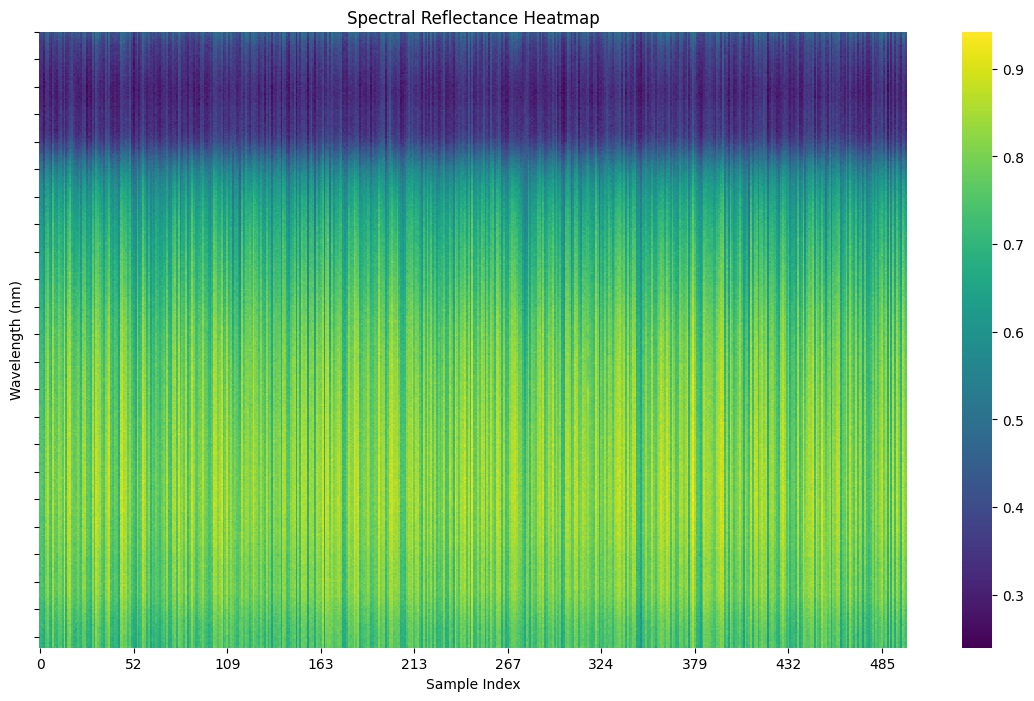

In [41]:

plt.figure(figsize=(14, 8))
sns.heatmap(X.T, cmap='viridis', cbar=True, xticklabels=50)



plt.title('Spectral Reflectance Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Wavelength Index' if not X.columns.dtype == 'O' else 'Wavelength (nm)')
plt.yticks(np.arange(0, X.shape[1], step=20))

plt.show()


# **Dimensionality Reduction**

In [42]:
# Apply PCA (Choose optimal components based on explained variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

In [43]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.87584316, 0.05310297, 0.02270519])

The variance explained by the top principal components is as follows:<br>
1st principal component: 86.77%<br>
2nd principal component: 5.99%<br>
3rd principal component: 2.26%

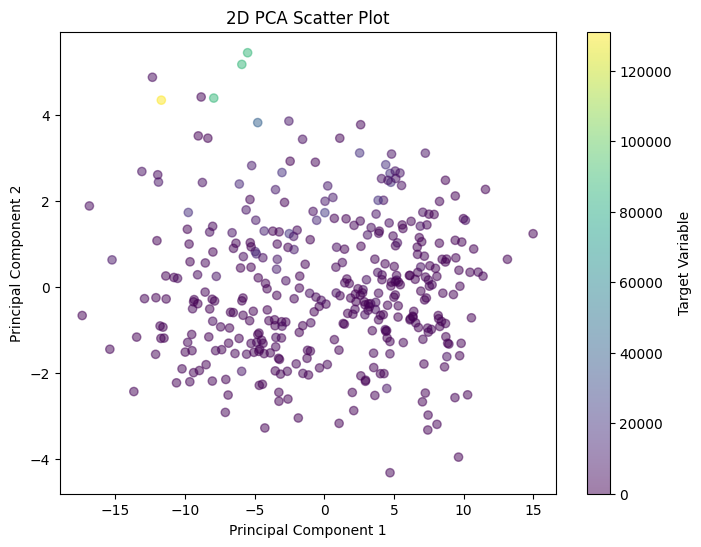

In [44]:
import matplotlib.pyplot as plt
# 2D Scatter Plot (First two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, c=y_train, cmap='viridis')
plt.colorbar(label='Target Variable')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot")
plt.show()

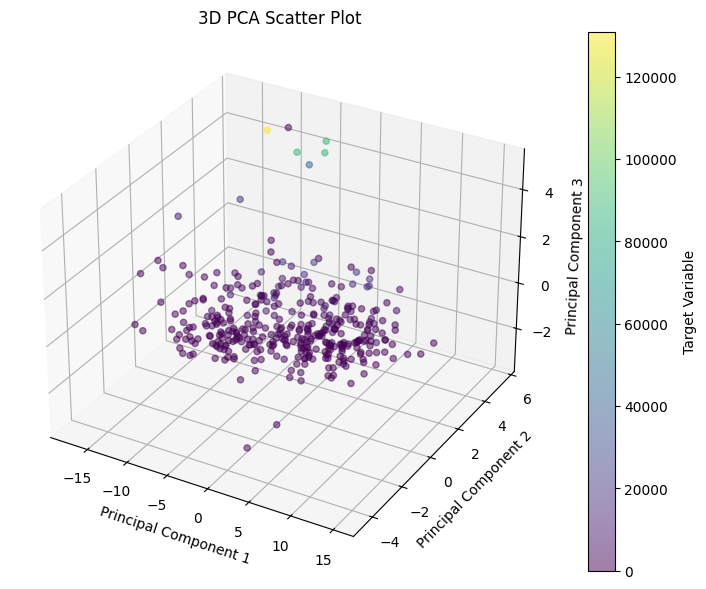

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Scatter Plot (First three principal components)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], alpha=0.5, c=y_train, cmap='viridis')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot")
fig.colorbar(sc, label='Target Variable')

plt.show()


# **MODEL TRAINING AND MODEL EAVLUATION**

In [23]:
# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Function to perform hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train):
    search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=10, scoring='r2', n_jobs=-1, random_state=42)
    search.fit(X_train, y_train)
    return search.best_estimator_

# Tune models
best_rf = tune_model(RandomForestRegressor(random_state=42), param_grid_rf, X_train_pca, y_train)
best_gb = tune_model(GradientBoostingRegressor(random_state=42), param_grid_gb, X_train_pca, y_train)
best_lgb = tune_model(lgb.LGBMRegressor(random_state=42), param_grid_lgb, X_train_pca, y_train)

# Evaluate tuned models
models = {
    "RandomForest": best_rf,
    "GradientBoosting": best_gb,
    "LightGBM": best_lgb
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (r2, mae, mse)

# Print Results
results_df = pd.DataFrame(results.items(), columns=["Model", "Metrics"])
results_df[["R² Score", "MAE", "MSE"]] = pd.DataFrame(results_df["Metrics"].tolist(), index=results_df.index)
results_df.drop(columns=["Metrics"], inplace=True)
print(results_df.sort_values(by="R² Score", ascending=False))

# MLP Model
mlp = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
mlp.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
mlp.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=100, batch_size=32, verbose=1)
y_pred = mlp.predict(X_test_pca)

print("MLP R²:", r2_score(y_test, y_pred))
print("MLP MAE:", mean_absolute_error(y_test, y_pred))
print("MLP MSE:", mean_squared_error(y_test, y_pred))

# CNN Model
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_pca.shape[1], 1), padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
X_train_cnn = X_train_pca.reshape(X_train_pca.shape[0], X_train_pca.shape[1], 1)
X_test_cnn = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)
cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=100, batch_size=32, verbose=1)
y_pred = cnn.predict(X_test_cnn)

print("CNN R²:", r2_score(y_test, y_pred))
print("CNN MAE:", mean_absolute_error(y_test, y_pred))
print("CNN MSE:", mean_squared_error(y_test, y_pred))

# GNN Model
gnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
gnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
gnn.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=100, batch_size=32, verbose=1)
y_pred = gnn.predict(X_test_pca)
print("GNN R²:", r2_score(y_test, y_pred))
print("GNN MAE:", mean_absolute_error(y_test, y_pred))
print("GNN MSE:", mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 371, number of used features: 3
[LightGBM] [Info] Start training from score 3094.293801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 124718280.0000 - mae: 2919.9058 - val_loss: 221844576.0000 - val_mae: 3295.8623
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 88885376.0000 - mae: 2506.1819 - val_loss: 221832176.0000 - val_mae: 3294.9160
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 221786048.0000 - mae: 3791.2537 - val_loss: 221816144.0000 - val_mae: 3293.7312
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 108104496.0000 - mae: 3087.6760 - val_loss: 221794720.0000 - val_mae: 3292.2012
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 119630344.0000 - mae: 2866.9050 - val_loss: 221763744.0000 - val_mae: 3290.0625
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 161205440.0000 - mae: 3472.6497 - val_loss: 221721552.0000 - val_mae: 3287.2319
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 127603368.0000 - mae: 2929.3799 - val_loss: 221668736.0000 - val_mae: 3283.6624
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 108921584.0000 - mae: 3002.6501 - val_loss: 221835248.0000 - val_mae: 3295.3994
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 186760320.0000 - mae: 3412.1423 - val_loss: 221818816.0000 - val_mae: 3294.2087
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 189347472.0000 - mae: 3627.3362 - val_loss: 221795728.0000 - val_mae: 3292.5188
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 174623216.0000 - mae: 3340.1155 - val_loss: 221760944.0000 - val_mae: 3290.0391
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 145416816.0000 - mae: 3358.1309 - val_loss: 221708656.0000 - val_mae: 3286.3694
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 133381632.0000 - mae: 2882.1777 - val_loss: 221636704.0000 - val_mae: 3281.4285
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 123751240.0000 - mae: 3161.8757 - val_loss: 221536672.0000 - val_mae: 3274.7507
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
GNN R²: 0.4383082074179615
GNN MAE: 3964.8230471252114
GNN MSE: 118511067.19136776


# Visualisation of Results

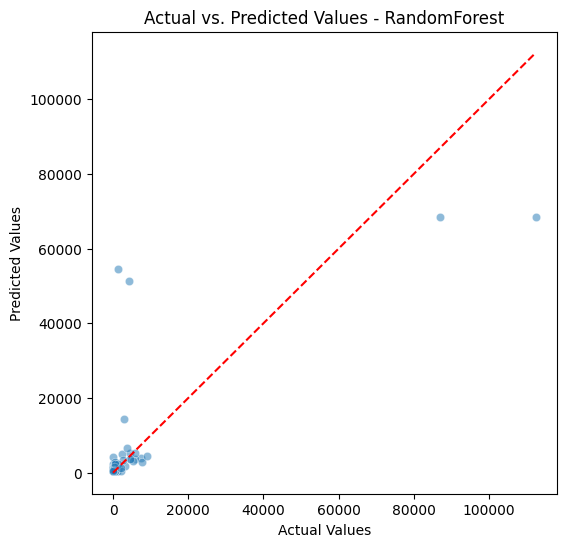

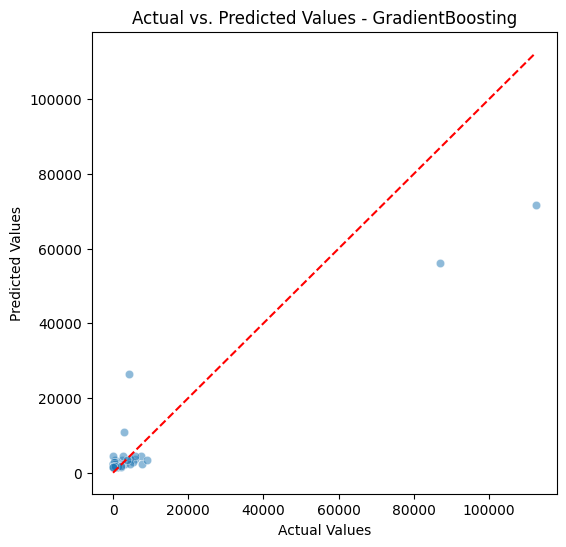

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


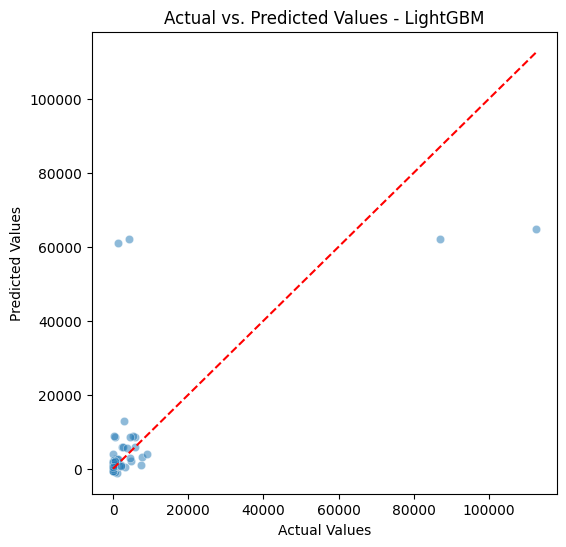

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


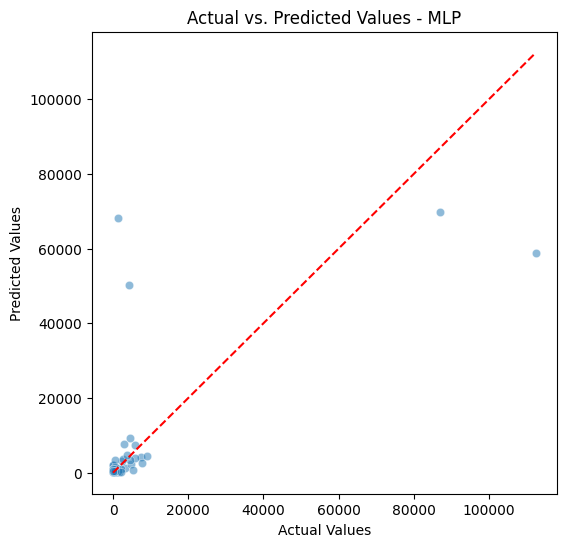

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


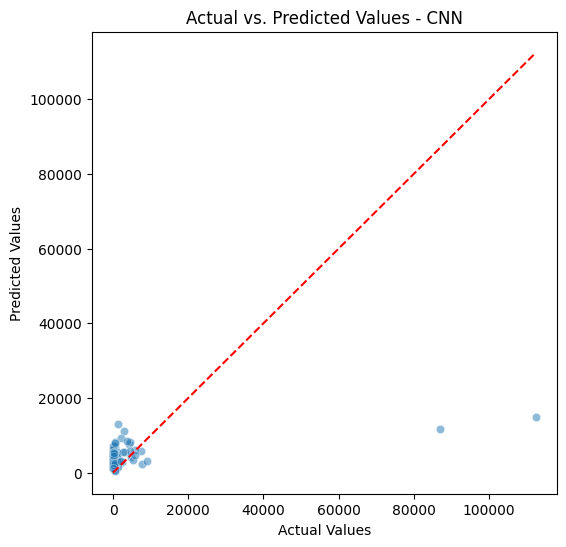

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


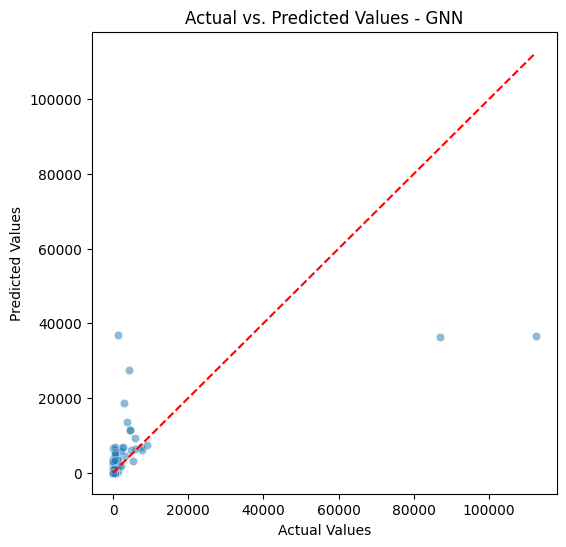

In [25]:

def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred.ravel(), alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values - {model_name}")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.show()

# Generate Scatter Plots for Each Model
for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    plot_scatter(y_test, y_pred, name)

y_pred_mlp = mlp.predict(X_test_pca)
plot_scatter(y_test, y_pred_mlp, "MLP")

y_pred_cnn = cnn.predict(X_test_cnn)
plot_scatter(y_test, y_pred_cnn, "CNN")

y_pred_gnn = gnn.predict(X_test_pca)
plot_scatter(y_test, y_pred_gnn, "GNN")

# **Summary of model performance and limitations**

**Best Performing Model: Gradient Boosting** <br>
**R² Score**: 0.825 (Highest) <br>
**MAE**: 2574.71 (Lowest) <br>
**MSE**: 3.70 × 10⁷ (Lowest) <br>

**Strengths:** <br>
- Strong predictive power and best generalization on test data. <br>
- Effectively handles non-linearity and feature interactions. <br>

**Limitations:** <br>
- Computationally expensive compared to simpler models. <br>
- May require hyperparameter tuning to avoid overfitting. <br>

---

**Random Forest (Moderate Performance)** <br>
**R² Score**: 0.613 (Lower than Gradient Boosting) <br>
**MAE**: 2724.45 (Slightly higher than Gradient Boosting) <br>
**MSE**: 8.17 × 10⁷ <br>

**Strengths:** <br>
- Handles high-dimensional data well. <br>
- Less prone to overfitting than single decision trees. <br>

**Limitations:** <br>
- Still lags behind Gradient Boosting in accuracy. <br>
- Requires more trees for better generalization, increasing computational cost. <br>

---

**LightGBM (Weaker Performance)** <br>
**R² Score**: 0.475 <br>
**MAE**: 3555.96 <br>
**MSE**: 1.11 × 10⁸ <br>

**Strengths:** <br>
- Fast training speed due to leaf-wise splitting. <br>

**Limitations:** <br>
- Substantially lower R² and higher errors indicate it struggles with capturing complex patterns. <br>
- May need better hyperparameter tuning. <br>

---

**Neural Networks (MLP, CNN, GNN) – Underperformed** <br>

**MLP (Moderate Performance):** <br>
- **R²**: 0.494 <br>
- **MAE**: 2800.95 <br>
- **MSE**: 1.07 × 10⁸ <br>
- **Limitations:** Might require deeper layers or hyperparameter tuning. <br>

**CNN (Poor Performance):** <br>
- **R²**: 0.162 (Worst) <br>
- **MAE**: 4926.41 (Highest) <br>
- **MSE**: 1.77 × 10⁸ <br>
- **Limitations:** CNNs are usually suited for spatial data like images rather than tabular data. <br>

**GNN (Better than CNN, but Worse than MLP):** <br>
- **R²**: 0.438 <br>
- **MAE**: 3964.82 <br>
- **MSE**: 1.19 × 10⁸ <br>
- **Limitations:** GNNs are designed for graph-structured data, which might not fit well with tabular data. <br>


### **Overall Limitations & Next Steps** <br>

**Neural Networks Underperformance:** <br>
- Likely due to insufficient data or suboptimal architecture. <br>
- Could benefit from hyperparameter tuning, feature engineering, or transfer learning. <br>

**Feature Engineering & Selection:** <br>
- Gradient Boosting performs well, but removing redundant/noisy features may improve all models. <br>

**Ensemble Learning:** <br>
- Combining models (e.g., blending Random Forest and Gradient Boosting) may improve generalization. <br>

**Hyperparameter Tuning:** <br>
- Fine-tuning LightGBM and MLP could improve their performance. <br>
